In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

/home/queimadas/.conda/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Configura Modelo e teste com 70%-30%
df = pd.read_csv('conhecimento_filtrado.csv')

df_conhecimento = df[df.verifica.isin([1,3])]
print(df_conhecimento.shape)

# Gera amostra para teste
ids_30 = classificacao.teste_30_ids(df_conhecimento)

teste_original = df_conhecimento[df_conhecimento.id.isin(ids_30)].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo_inteiro = df_conhecimento[~df_conhecimento.id.isin(ids_30)].copy()

modelo_inteiro_1 = modelo_inteiro[modelo_inteiro.verifica==1].copy()
modelo_inteiro_3_full = modelo_inteiro[modelo_inteiro.verifica==3].copy()

id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]

modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

print(len(modelo))
print(modelo.verifica.value_counts())

(71657, 13)
21497
18254
3    9127
1    9127
Name: verifica, dtype: int64


In [4]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [5]:
y_pred = classificacao.classifica(modelo, teste, colunas_stats)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[ 3452   314]
 [   79 17652]]
Normalized confusion matrix
[[0.91662241 0.08337759]
 [0.00445547 0.99554453]]


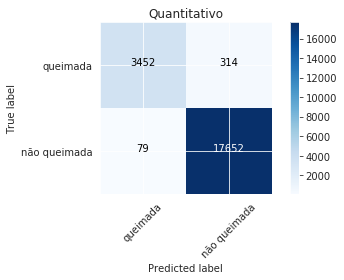

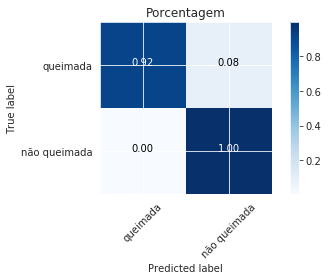

Acertos: 21104/21497 (98%)


In [6]:
classificacao.mostra_resultado(y_pred, y_true)